# CISC 6210 HW3 Zhiyu Xu

The first code block is used for reading and preprocessing source data.

In [1]:
from sklearn.model_selection import train_test_split
import requests
from bs4 import BeautifulSoup as bs
import random, re

head = {
    'User-Agent': 'Mozilla/4.0(compatible;MSIE 5.5;Windows NT)'
}

def html_text(url):
    html = requests.get(url, headers = head)
    source = html.text
    soup = bs(source, 'lxml')
    raw_text = soup.find_all('review_text')
    raw_list = [l.text for l in raw_text]
    result = ' '.join(raw_list)
    return result.lower()

positive_url = 'https://storm.cis.fordham.edu/~yli/data/electronics/positive.review'
negative_url = 'https://storm.cis.fordham.edu/~yli/data/electronics/negative.review'
good_text = html_text(positive_url)
bad_text = html_text(negative_url)

print(good_text)


i purchased this unit due to frequent blackouts in my area and 2 power supplies going bad.  it will run my cable modem, router, pc, and lcd monitor for 5 minutes.  this is more than enough time to save work and shut down.   equally important, i know that my electronics are receiving clean power.

i feel that this investment is minor compared to the loss of valuable data or the failure of equipment due to a power spike or an irregular power supply.

as always, amazon had it to me in <2 business days
 
i ordered 3 apc back-ups es 500s on the recommendation of an employee of mine who used to work at apc. i've had them for about a month now without any problems. they've functioned properly through a few unexpected power interruptions. i'll gladly order more if the need arises.

pros:
 - large plug spacing, good for power adapters
 - simple design
 - long cord

cons:
 - no line conditioning (usually an expensive option
 
wish the unit had a separate online/offline light.  when power to the

The following code block performs tokenization and stemming.
By using the RegexpTokenizer, it generates the token set without the punctuations.

In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
good_tokens = tokenizer.tokenize(good_text)
bad_tokens = tokenizer.tokenize(bad_text)

from nltk.stem import PorterStemmer
ps = PorterStemmer()
good_tokens = [ps.stem(g) for g in good_tokens]
bad_tokens = [ps.stem(b) for b in bad_tokens]

print(bad_tokens)

['con', 'tip', 'extrem', 'easi', 'on', 'carpet', 'and', 'if', 'you', 'have', 'a', 'lot', 'of', 'cd', 'stack', 'at', 'the', 'top', 'poorli', 'design', 'it', 'is', 'a', 'vertic', 'cd', 'rack', 'that', 'doesnt', 'have', 'individu', 'slot', 'for', 'cd', 'so', 'if', 'you', 'want', 'a', 'cd', 'from', 'the', 'bottom', 'of', 'a', 'stack', 'you', 'have', 'basic', 'pull', 'the', 'whole', 'stack', 'to', 'get', 'to', 'it', 'put', 'it', 'togeth', 'wa', 'a', 'pain', 'the', 'one', 'i', 'bought', 'i', 'had', 'to', 'break', 'a', 'piec', 'of', 'metal', 'just', 'to', 'fit', 'it', 'in', 'it', 'guid', 'hole', 'again', 'poorli', 'design', 'doesnt', 'even', 'fit', 'cd', 'that', 'well', 'there', 'are', 'gap', 'and', 'the', 'cd', 'cass', 'are', 'loos', 'fit', 'pro', 'i', 'guess', 'it', 'can', 'hold', 'a', 'lot', 'of', 'cd', 'it', 's', 'a', 'nice', 'look', 'but', 'it', 'tip', 'over', 'veri', 'easili', 'it', 'is', 'not', 'steadi', 'on', 'a', 'rug', 'surfac', 'dispit', 'what', 'the', 'pictur', 'on', 'the', 'box',

Generate another copy without stopwords.

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
good_filtered = [g for g in good_tokens if not g in stop_words]
bad_filtered = [b for b in bad_tokens if not b in stop_words]

print(good_filtered)

['purchas', 'thi', 'unit', 'due', 'frequent', 'blackout', 'area', '2', 'power', 'suppli', 'go', 'bad', 'run', 'cabl', 'modem', 'router', 'pc', 'lcd', 'monitor', '5', 'minut', 'thi', 'enough', 'time', 'save', 'work', 'shut', 'equal', 'import', 'know', 'electron', 'receiv', 'clean', 'power', 'feel', 'thi', 'invest', 'minor', 'compar', 'loss', 'valuabl', 'data', 'failur', 'equip', 'due', 'power', 'spike', 'irregular', 'power', 'suppli', 'alway', 'amazon', '2', 'busi', 'day', 'order', '3', 'apc', 'back', 'es', '500', 'recommend', 'employe', 'mine', 'use', 'work', 'apc', 'month', 'without', 'ani', 'problem', 'function', 'properli', 'unexpect', 'power', 'interrupt', 'gladli', 'order', 'need', 'aris', 'pro', 'larg', 'plug', 'space', 'good', 'power', 'adapt', 'simpl', 'design', 'long', 'cord', 'con', 'line', 'condit', 'usual', 'expens', 'option', 'wish', 'unit', 'separ', 'onlin', 'offlin', 'light', 'power', 'unit', 'miss', 'singl', 'red', 'light', 'turn', 'onli', 'warn', 'sound', 'warn', 'soun

The following code block finds the most 20, 50, 100 frequent words from both positive and negative class.
For each iteration, after generating the wordcloud, it prints the shared word list from both positive and negative class. 

Most Common 20


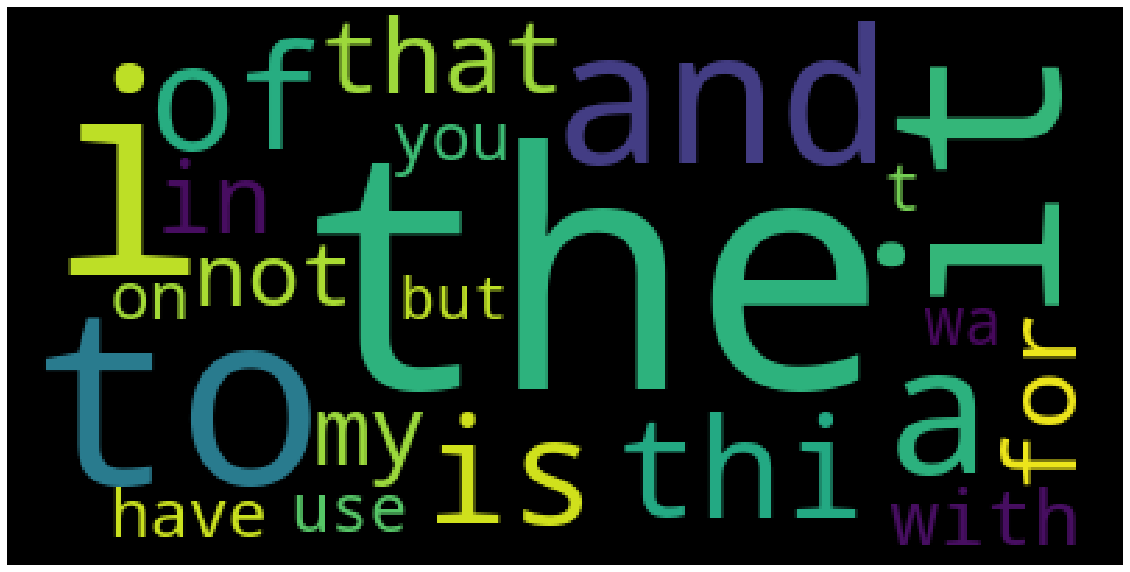

['of', 'thi', 'have', 'you', 'and', 'i', 'on', 'that', 't', 'it', 'is', 'with', 'for', 'in', 'my', 'to', 'the', 'a']
Total common words:  18
Most Common 50


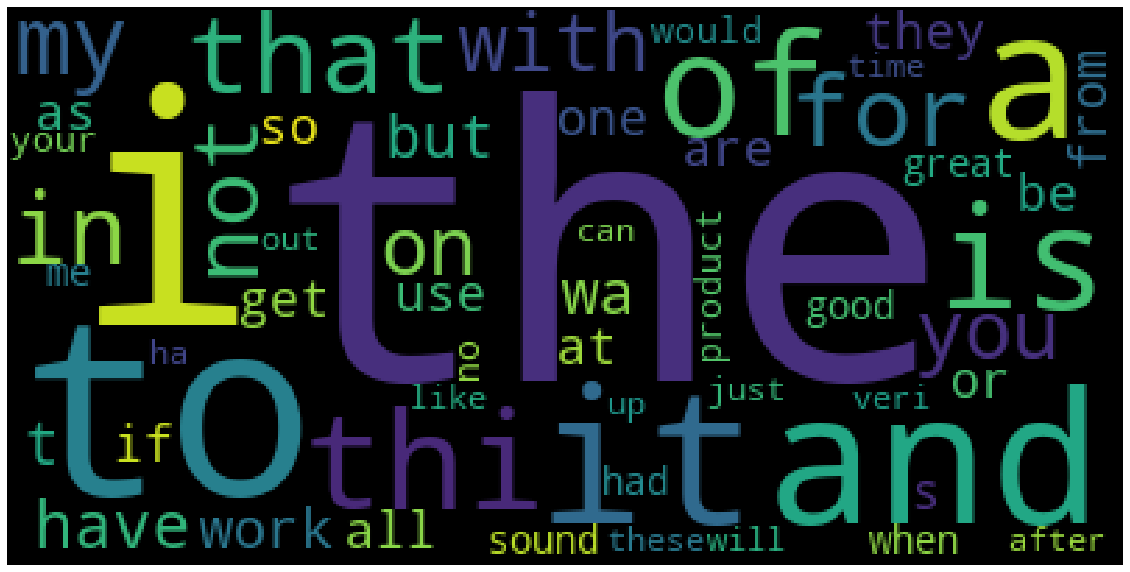

['when', 'of', 'work', 'i', 'on', 't', 'or', 'with', 'so', 'thi', 'have', 'not', 'you', 'and', 'all', 'no', 'one', 'at', 'can', 'that', 's', 'it', 'for', 'if', 'had', 'to', 'but', 'just', 'use', 'wa', 'as', 'get', 'in', 'be', 'they', 'up', 'are', 'veri', 'is', 'my', 'from', 'the', 'a']
Total common words:  43
Most Common 100


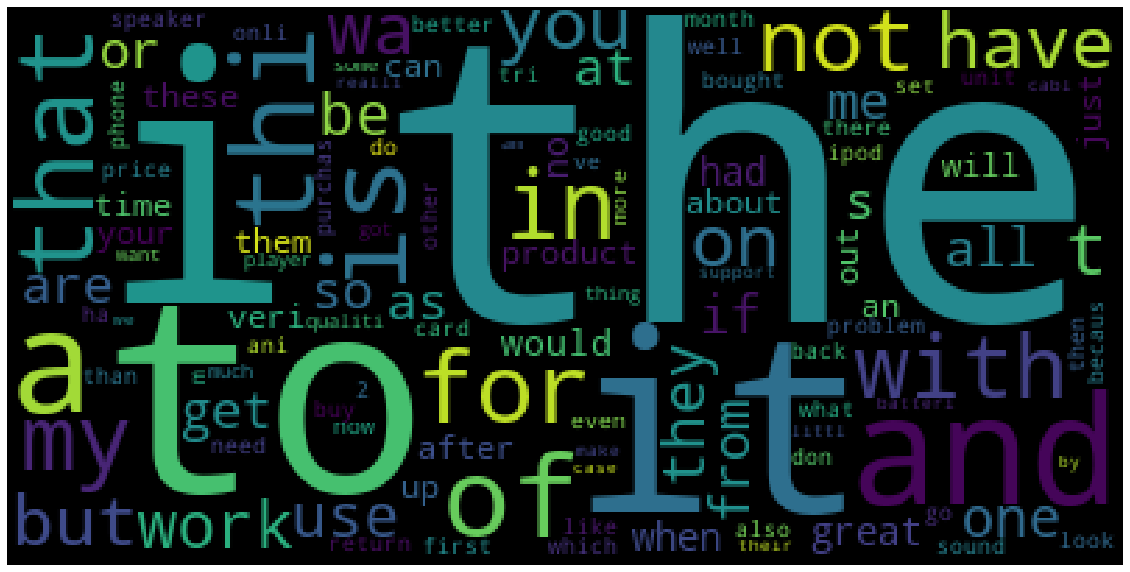

['m', 't', 'time', 'other', 'problem', 'have', 'you', 'and', 'which', 'ipod', 'at', 'can', 'them', '2', 'product', 'just', 'your', 'about', 'becaus', 'am', 'up', 'onli', 'more', 'ha', 'a', 'when', 'even', 'work', 'phone', 'or', 'with', 'sound', 'so', 'ani', 'bought', 'it', 'had', 'purchas', 'wa', 'as', 'will', 'an', 'go', 'veri', 'there', 'my', 'from', 'cabl', 'of', 'me', 'like', 'buy', 'thi', 'no', 'one', 'that', 'for', 'if', 'to', 'get', 'than', 'they', 'are', 'qualiti', 'don', 'is', 'the', 'these', 'i', 'on', 'would', 'not', 'all', 's', 'unit', 'but', 'out', 'use', 'some', 'good', 'in', 'be', 'do']
Total common words:  83


In [14]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(text):
    text_list = Counter(text)
    d = {}
    for k, v in text_list:
        d[k] = int(v)
    wordcloud = WordCloud().generate_from_frequencies(d)
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    pass

def shared_words(list1, list2):
    l1 = {}
    l2 = {}
    for k, v in list1:
        l1[k] = int(v)
    for k, v in list2:
        l2[k] = int(v)
    return list(set(l1) & set(l2))

ns = [20, 50, 100]
for n in ns:
    print('Most Common', n)
    gm = Counter(good_tokens).most_common(n)
    bm = Counter(bad_tokens).most_common(n)
    #result = gm + bm
    show_wordcloud(gm + bm)
    shared = shared_words(gm, bm)
    print(shared)
    print('Total common words: ', len(shared))

Find the shared words frequency between two classes in two scenatios.

In [38]:
import operator

def cc(lst1, lst2):
    freq = {}
    for item in lst1:
        freq[item] = lst2.count(item)
    freq = sorted(freq.items(), key = operator.itemgetter(1), reverse=True)

    for key, value in freq:
        print(key, ':', value)
        
gm = Counter(good_tokens).most_common(5000)
bm = Counter(bad_tokens).most_common(5000)
gfm = Counter(good_filtered).most_common(5000)
bfm = Counter(bad_filtered).most_common(5000)

filter_shared = shared_words(gfm, bfm)
non_f_shared = shared_words(gm, bm)

#CountFrequency(good_tokens)
print('Shared words frequency in positive class without stopwords:')
cc(filter_shared, good_tokens)
print('Shared words frequency in negative class without stopwords:')
cc(filter_shared, bad_tokens)
print('Shared words frequency in positive class with stopwords:')
cc(non_f_shared, good_tokens)
print('Shared words frequency in positive class with stopwords:')
cc(non_f_shared, bad_tokens)

Shared words frequency in positive class without stopwords:
thi : 1366
use : 854
wa : 597
one : 505
veri : 446
work : 442
good : 418
sound : 417
great : 414
get : 352
like : 323
ha : 302
qualiti : 293
phone : 275
product : 274
onli : 273
price : 271
would : 269
well : 266
time : 255
also : 249
speaker : 244
need : 236
buy : 218
look : 216
cabl : 214
problem : 212
bought : 206
ipod : 200
go : 196
2 : 190
better : 186
set : 185
even : 183
player : 180
much : 180
ani : 178
want : 178
becaus : 173
realli : 172
purchas : 172
littl : 170
unit : 169
make : 169
case : 168
batteri : 165
easi : 164
headphon : 163
recommend : 152
mous : 150
1 : 148
first : 146
card : 144
review : 144
dvd : 138
best : 136
new : 136
doe : 135
plug : 131
pictur : 130
sinc : 129
thing : 129
screen : 129
connect : 129
button : 127
small : 126
take : 125
record : 124
system : 124
music : 123
featur : 123
still : 123
bass : 120
tri : 120
nice : 119
amazon : 118
year : 118
come : 117
3 : 117
5 : 116
lot : 115
bit : 114
c

In [39]:
print(len(good_filtered))
good = [g for g in good_filtered if not g in filter_shared]
print(len(bad_filtered))
bad = [b for b in bad_filtered if not b in filter_shared]
print(len(good))
print(len(bad))

59369
59314
4541
4037


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

data = []
labels = []

for i in good:
    data.append(i)
    labels.append('pos')

for i in bad:
    data.append(i)
    labels.append('neg')

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)

features = vectorizer.fit_transform(data)
features_nd = features.toarray()

X_train, X_test, y_train, y_test = train_test_split(
    features_nd,
    labels,
    train_size=0.80,
    random_state=1234)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print('F-score:', metrics.f1_score(y_test, y_pred, average='macro'))

Precision: 0.7619024398028865
Recall: 0.7011595853059267
F-score: 0.6729408286026259


In [42]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 1.0, solver = 'lbfgs', max_iter = 500)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print('Precision:', metrics.precision_score(y_test, y_pred, average='macro'))

Precision: 0.7965686274509804


In [50]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

most_informative_feature_for_binary_classification(vectorizer, log, 20)

neg -2.559286443412184 tomtom
neg -1.910011962564621 unaccept
neg -1.789288239208662 assur
neg -1.789288239208662 dlink
neg -1.7329638818651687 crap
neg -1.7329638818651687 rep
neg -1.7213766996715913 eject
neg -1.7213766996715913 radar
neg -1.7213766996715913 reinstal
neg -1.6471463337004721 excit
neg -1.5652065808128537 cursor
neg -1.5652065808128537 rma
neg -1.5652065808128537 unus
neg -1.4916703911013376 gigabeat
neg -1.4916703911013371 sudden
neg -1.4736655127339966 adf
neg -1.4736655127339966 corrupt
neg -1.4736655127339966 repeatedli
neg -1.4736655127339966 spoke
neg -1.4736655127339966 stapl
pos 2.0649065210639503 backpack
pos 1.825334822827759 theater
pos 1.825334822827759 nvidia
pos 1.70489844941448 crisp
pos 1.611183226742509 studio
pos 1.611183226742509 budget
pos 1.5468957389359699 eb
pos 1.5468957389359699 512
pos 1.47674857016082 len
pos 1.3995408151239535 thx
pos 1.3995408151239535 quadrofx
pos 1.3995408151239535 e30
pos 1.3995408151239535 commerci
pos 1.399540815123953